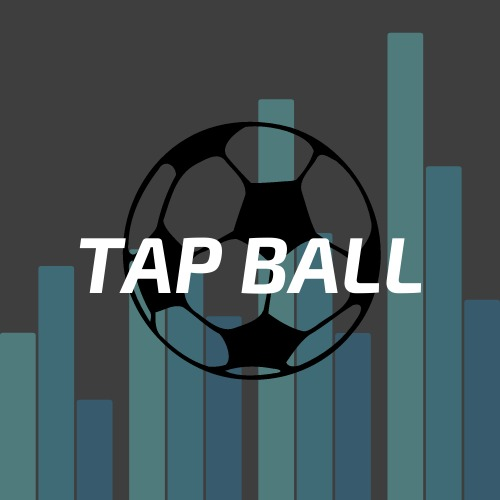

# Project description and aims

TapBall is a university project made by student Vincent Pastor (X81000834) from the University of Catania. The idea was born in occasion of UEFA Euro 2020, as indeed the project consist of trying to <b>predict in real time the winning chance of the competing teams<b> during the match.

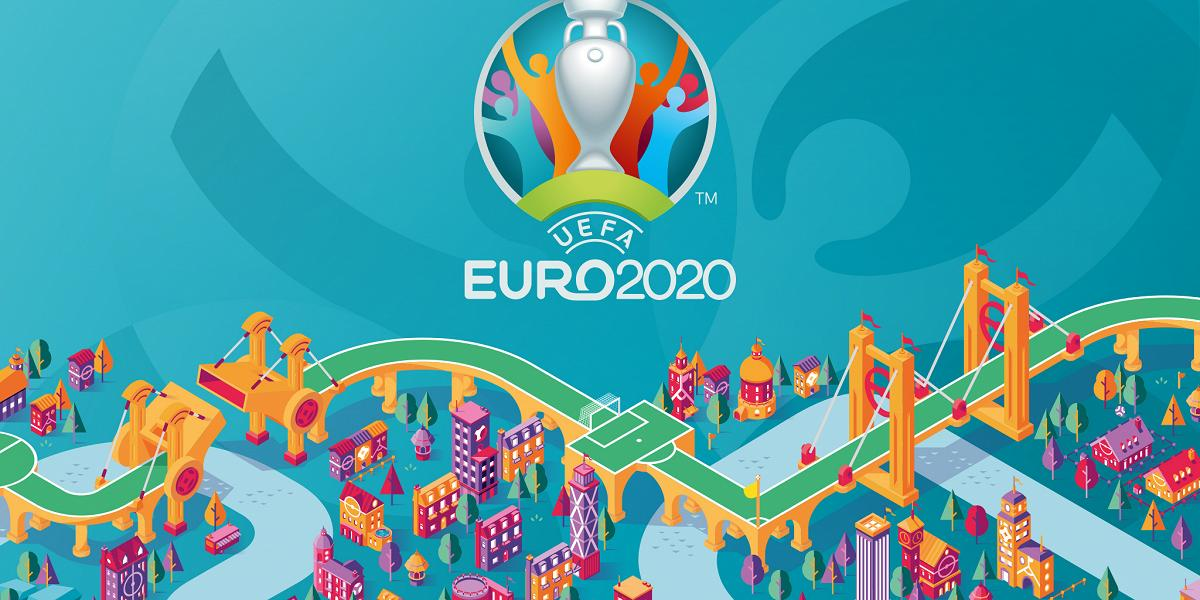

# Tools

This project has been realised with the help of a variety of technologies:
<ul>
    <li><b>Logstash</b>, used for data ingestion from multiple sources</li>
    <li><b>Apache Kafka</b>, a platform employed for data streaming analytics</li>
    <li><b>Spark</b>, for data processing</li>
    <li>The search and analytic engine <b>Elasticsearch</b>, for data indexing</li>
    <li><b>Kibana</b>, to visualize the Elasticsearch data</li>
</ul>

<img src="./img/schema.png">

# Data source - API

The data are collected from the website Api-Football, which provides an API (Application Programming Interface) that offers different kind of endpoint you can engage with for real-time data collection.

<img src="./img/Architecture.jpg">

In the website it is possible to do queries through various programming languages such as Java, Js, C++ and so on. <b>Python</b> is the one employed in this project.

In [ ]:
import http.client
import json
file = open("../Logstash/data/fixtures.json", "w")

conn = http.client.HTTPSConnection("v3.football.api-sports.io")
    
headers = {
    'x-rapidapi-host': "v3.football.api-sports.io",
    'x-rapidapi-key': "xxxxxxxxxxxxxxxxxxxxxxxxx"
    }
conn.request("GET", "/fixtures?league=4&season=2020", headers=headers)

res = conn.getresponse()
data = res.read()
pretty = json.loads(data)
file.write(json.dumps(pretty, indent=4))
file.close()




Given the huge number of data received, they undergoes  process of parsing,  pulling only out the relevant information through Python - the easiest way. After extracting the data, those are written  in a .cvs file, so that they can be re-used for data training, <b>since the API does not provides the match data minute by minute but only the data of the completed football game</b>

{
    "errors": [], 
    "parameters": {
        "fixture": "657688"
    }, 
    "get": "fixtures/statistics", 
    "results": 2, 
    "paging": {
        "current": 1, 
        "total": 1
    }, 
    "response": [
        {
            "statistics": [
                {
                    "type": "Shots on Goal", 
                    "value": null
                }, 
                {
                    "type": "Shots off Goal", 
                    "value": null
                }, 
                {
                    "type": "Total Shots", 
                    "value": null
                }, 
                {
                    "type": "Blocked Shots", 
                    "value": null
                }, 
                {
                    "type": "Shots insidebox", 
                    "value": null
                }, 
                {
                    "type": "Shots outsidebox", 
                    "value": null
                }, 
                {
                    "type": "Fouls", 
                    "value": null
                }, 
                {
                    "type": "Corner Kicks", 
                    "value": null
                }, 
                {
                    "type": "Offsides", 
                    "value": null
                }, 
                {
                    "type": "Ball Possession", 
                    "value": "0%"
                }, 
                {
                    "type": "Yellow Cards", 
                    "value": null
                }, 
                {
                    "type": "Red Cards", 
                    "value": null
                }, 
                {
                    "type": "Goalkeeper Saves", 
                    "value": null
                }, 
                {
                    "type": "Total passes", 
                    "value": null
                }, 
                {
                    "type": "Passes accurate", 
                    "value": null
                }, 
                {
                    "type": "Passes %", 
                    "value": null
                }
            ], 
            "team": {
                "logo": "https://media.api-sports.io/football/teams/768.png", 
                "id": 768, 
                "name": "Italy"
            }
        }, 
        {
            "statistics": [
                {
                    "type": "Shots on Goal", 
                    "value": null
                }, 
                {
                    "type": "Shots off Goal", 
                    "value": null
                }, 
                {
                    "type": "Total Shots", 
                    "value": null
                }, 
                {
                    "type": "Blocked Shots", 
                    "value": null
                }, 
                {
                    "type": "Shots insidebox", 
                    "value": null
                }, 
                {
                    "type": "Shots outsidebox", 
                    "value": null
                }, 
                {
                    "type": "Fouls", 
                    "value": null
                }, 
                {
                    "type": "Corner Kicks", 
                    "value": null
                }, 
                {
                    "type": "Offsides", 
                    "value": null
                }, 
                {
                    "type": "Ball Possession", 
                    "value": "100%"
                }, 
                {
                    "type": "Yellow Cards", 
                    "value": null
                }, 
                {
                    "type": "Red Cards", 
                    "value": null
                }, 
                {
                    "type": "Goalkeeper Saves", 
                    "value": null
                }, 
                {
                    "type": "Total passes", 
                    "value": 1
                }, 
                {
                    "type": "Passes accurate", 
                    "value": 1
                }, 
                {
                    "type": "Passes %", 
                    "value": "100%"
                }
            ], 
            "team": {
                "logo": "https://media.api-sports.io/football/teams/15.png", 
                "id": 15, 
                "name": "Switzerland"
            }
        }
    ]
}

Example of elaborated data:
<ul>
<li>Italy,0,0,0,0,0,0,0,0,0,0,0 </li>
<li>Switzerland,0,0,0,0,0,100,0,0,1,1,100</li>
<li>Italy,0,0,0,1,0,0,0,0,0,0,0</li>
<li>Switzerland,0,0,0,0,0,100,0,0,8,8,100</li>
<li>Italy,0,0,0,1,0,14,0,0,8,7,88</li>
<li>Switzerland,0,0,0,1,0,86,0,0,46,41,89</li>
<li>Italy,0,1,2,1,0,53,0,0,94,84,89</li>
<li>Switzerland,0,0,0,1,0,47,0,0,83,69,83</li>
</ul>

# Data ingestion - Logstash

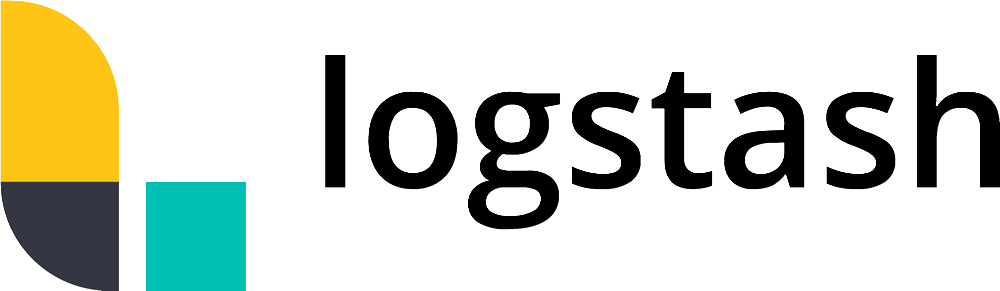

As previously stated, the data received from the API are stored in a .cvs file. These datas are taken then by Logstash. This latter is a tool used to collect, process and submit the event and log messages. The data collection is carried out through configurable plug-in input. Once the plug-in input collects data, these can be processed through various filters that edit and annotate the event data. Lastly, <b>Logstash submit the event to output plugins</b>, which in turn can forward the event to different external software such as Elastisearch, Kafka, local file and so on. 
<b>My Logstast implementation see the input file taken and submitted as output to Kafka, on the 'data' topic.</b>

<code> 
input {
    file {
        # source
        path => "/myvol/data.csv"
        id => "less"
        # start reading
        start_position => "beginning"
        # check every 2 second
        stat_interval =>  2
    }
}

output {
    stdout { }
    # send to fafka
    kafka {
        codec => json
        topic_id => "tapball"
        bootstrap_servers => "kafkaServer:9092"
    }      
}</code>

# Data streaming - Kafka

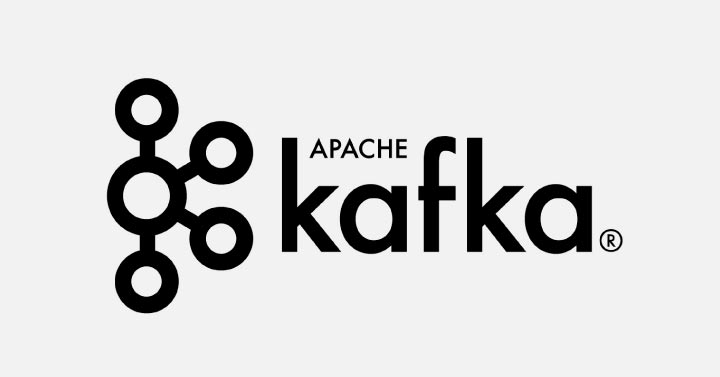

Apace Kafka is an open-source distributed event streaming platform developed by Apache Software Foundation and written with Scala and Java. It is run as cluster on one (or more) servers. The individual nodes of a cluster are called broker, and they categorise and save incoming data streams in the so-called topics. On Kafka two main figures are concerned:
- the producer, that has the role to produce data
- the consumer, that is interested in data.

The producer sends data by marking it with a topic that the receiver will receive according to the topic he is interested.
In this project, the role of produces is given to Logstash, and the consumer is Stark.

# Data Processing - Spark

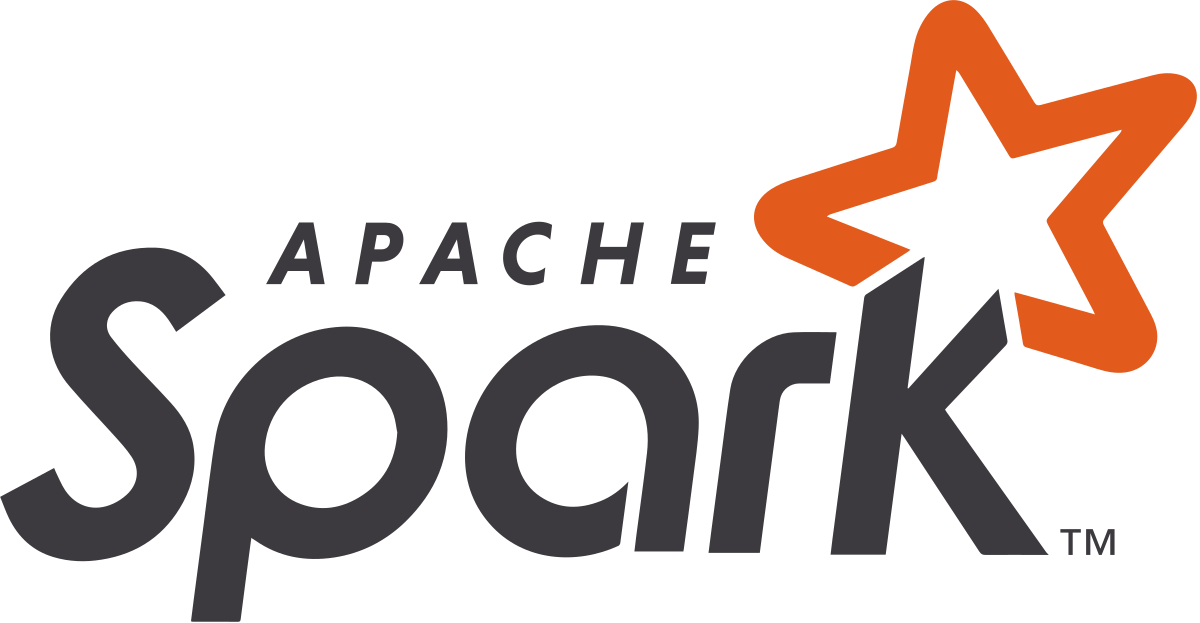

Spark is the tool we use to elaborate the data. It allows us to predict the match outcome in quick and simple way  (not so simple, but still). The data received in real time from Kafka are transformed into data structures - called DataFrame - provided by Spark.sql. The algorithm employed for data evaluation is a <b>Decision Tree</b>. Four type of decision tree are used: two classifies and two regressor. One pair of classifier and regressor calculate the prediction from the partial stats of the two competing team<b> (FULL)</b>. The other pair, instead, calculate the prediction based on the data of the two team statistical differences<b> (MINUS)</b>.

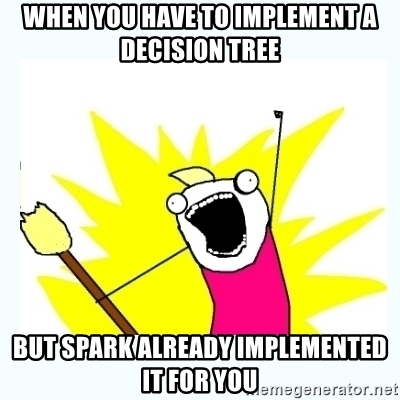

In [ ]:
# instantiate spark environment
sc = SparkContext("local[*]", "Decision Tree Classifier")
spark = SparkSession(sc)
sc.setLogLevel('WARN')

# load the dataset
FULL = spark.read.csv("/Dataset/Dataset_LESS.csv", inferSchema=True) \
    .toDF("Team","Shots_goal", "Shots_off", "Total","Fouls","Corners","Ball_possesion","Yellow","Red","Total_Passes","Accurate","Passes%", "Result")
MINUS = spark.read.csv("/Dataset/Dataset_FULL.csv", inferSchema=True) \
    .toDF("Team","Shots_goal", "Shots_off", "Total","Fouls","Corners","Ball_possesion","Yellow","Red","Total_Passes","Accurate","Passes%", "Result")

# Transformer — create a new “features” column that store all data features as an array
vector_assembler = VectorAssembler(inputCols=["Shots_goal", "Shots_off", "Total","Fouls","Corners","Ball_possesion","Yellow","Red","Total_Passes","Accurate","Passes%"],outputCol="features")

dfFULL = vector_assembler.transform(FULL) \
    .drop("Shots_goal", "Shots_off", "Total","Fouls","Corners","Ball_possesion","Yellow","Red","Total_Passes","Accurate","Passes%")
dfLESS = vector_assembler.transform(MINUS) \
    .drop("Shots_goal", "Shots_off", "Total","Fouls","Corners","Ball_possesion","Yellow","Red","Total_Passes","Accurate","Passes%")

# train our model using training data
TreeClassRegressorFULL = DecisionTreeRegressor(labelCol="Result", featuresCol="features")
TreeClassRegressorMINUS = DecisionTreeRegressor(labelCol="Result", featuresCol="features")
TreeClassClassificationFULL = DecisionTreeClassifier(labelCol="Result", featuresCol="features")
TreeClassClassificationMINUS = DecisionTreeClassifier(labelCol="Result", featuresCol="features")

modelRegressorFull = TreeClassRegressorFULL.fit(dfFULL)
modelRegressorMinus = TreeClassRegressorMINUS.fit(dfMINUS)
modelClassifierFull = TreeClassClassificationFULL.fit(dfFULL)
modelClassifierMinus = TreeClassClassificationMINUS.fit(dfMINUS)


modelRegressorFull.save("/Trees/Regressor/TreeRegressorFULL")
modelRegressorMINUS.save("/Trees/Regressor/TreeRegressorMINUS")
modelClassifierFull.save("/Trees/Classifier/TreeClassifierFULL")
modelClassifierMINUS.save("/Trees/Classifier/TreeClassifierMINUS")
#predictions = modelR.transform(df_p)


You can choose the regressor or classifier algorithm you may want by modifying the 'tree' variable from the main.py file, found inside 'Spark' directory.  

# Data indexing - Elasticsearch

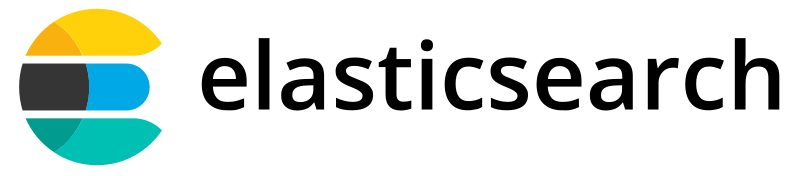

Elasticsearch is a distributed, open source search and analytics engine for all types of data, including textual, numerical, geospatial, structured, and unstructured. Elasticsearch is built on Apache Lucene and was first released in 2010 by Elasticsearch N.V. (now known as Elastic). Known for its simple REST APIs, distributed nature, speed, and scalability, Elasticsearch is the central component of the Elastic Stack, a set of open source tools for data ingestion, enrichment, storage, analysis, and visualization.

the index used in the project is <b>TapBall</b>


# Visualize data - Kibana

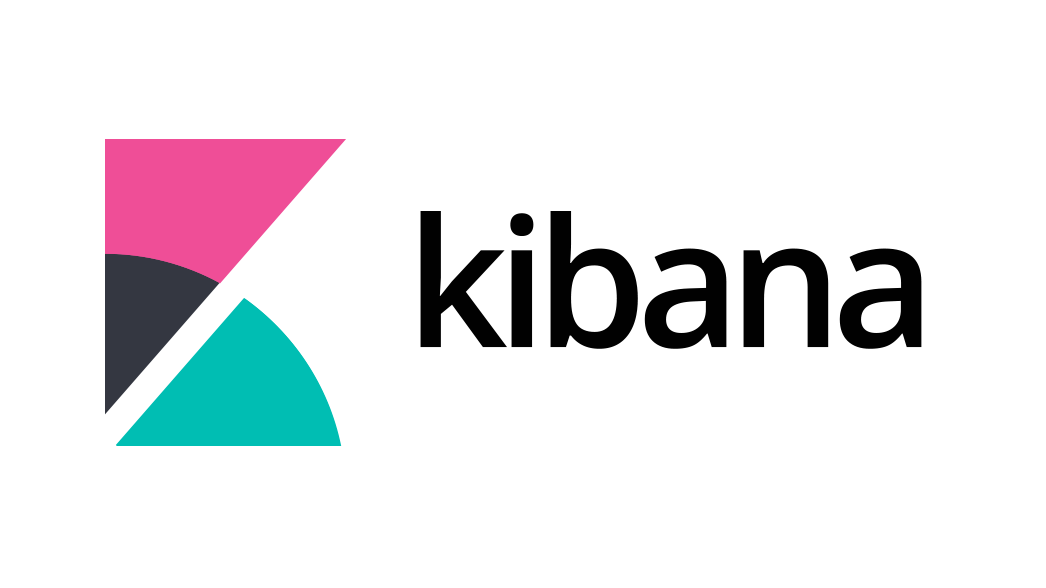

Kibana is a free user dashboard that lets us visualise the indexed Elasticsearch data. It allows us to create different kind of charts of large-volume data, so that the data are easier to understand.


# Note

 Further issue I would like to do in the future:
- Have a large-volume real time stats - minute by minute - in order to develop an algorithm that is capable to evaluate the teams performances from the perspective of how the are actually playing in the field.
- Work on more information about different areas of the field (and not only, for example, information about goal shooting)
- Improve data transfer. An example may be to link the Python and Kafka connect scripts so that the transition from Logstash would be deleted.

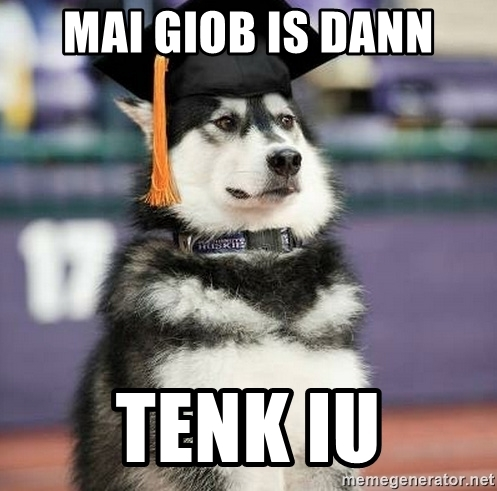